In [1]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 8.4/8.4 MB 17.2 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

In [4]:
data=pd.read_csv(r"C:\Users\madhu\Downloads\BrainStrokePrediction\dataset\healthcare-dataset-stroke-data.csv")

In [5]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory data analysis

In [6]:
data.shape

(5110, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Lets fill Null Values

In [9]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [10]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [11]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [12]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [13]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
data.drop('id',axis=1,inplace=True)

In [15]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Outlier Removation

In [16]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

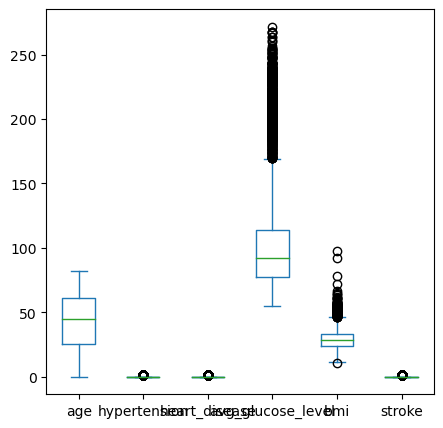

In [17]:
data.plot(kind='box')
plt.show()

# Label Encoding

In [18]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [19]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [20]:
gender=enc.fit_transform(data['gender'])

In [21]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [22]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [23]:
data['work_type']=work_type

In [24]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [25]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Splitting the data for train and test

X ---train_X,test_X  80/20                   
Y ---train_Y,test_Y

In [27]:
X=data.drop('stroke',axis=1)

In [28]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [29]:
Y=data['stroke']

In [30]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [32]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2285,1,49.0,0,0,1,2,0,79.64,28.893237,3
4733,1,67.0,0,0,1,2,0,83.16,25.500000,1
3905,1,78.0,0,0,1,2,1,208.85,24.400000,1
4700,1,47.0,0,0,1,2,0,110.14,30.500000,3
4939,0,59.0,0,0,1,2,1,71.08,28.100000,2
...,...,...,...,...,...,...,...,...,...,...
1180,0,62.0,0,0,1,2,0,82.57,36.000000,1
3441,0,59.0,0,0,1,3,1,90.06,28.900000,3
1344,1,47.0,0,0,1,2,0,86.37,39.200000,3
4623,1,25.0,0,0,1,0,1,166.38,23.100000,2


In [33]:
Y_train

2285    0
4733    0
3905    0
4700    0
4939    0
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: stroke, Length: 4088, dtype: int64

In [34]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2413,0,58.00,0,0,1,2,0,100.42,39.500000,3
1141,1,57.00,0,0,1,2,0,90.06,29.800000,0
146,1,65.00,0,0,1,3,1,68.43,28.893237,1
3883,0,1.64,0,0,0,4,1,69.89,18.100000,0
1044,0,79.00,0,0,1,0,1,93.89,30.400000,2
...,...,...,...,...,...,...,...,...,...,...
2261,1,59.00,0,0,1,2,1,60.35,25.900000,1
4712,1,57.00,0,0,1,2,1,93.04,29.200000,2
4971,0,63.00,0,0,1,2,1,57.06,37.900000,2
2224,1,57.00,0,0,1,2,0,76.28,31.400000,1


In [35]:
Y_test

2413    0
1141    0
146     1
3883    0
1044    0
       ..
2261    0
4712    0
4971    0
2224    0
4825    0
Name: stroke, Length: 1022, dtype: int64

# Normalize

In [36]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [37]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [38]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# lets save the scaler object

In [39]:
import pickle
import os


In [41]:
scaler_path=os.path.join('C:\\Users\\madhu\\Downloads\\BrainStrokePrediction','models\\svm.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [42]:
X_train_std

array([[ 1.19359699,  0.2521852 , -0.33069968, ..., -0.58626884,
         0.00238781,  1.51158251],
       [ 1.19359699,  1.04686385, -0.33069968, ..., -0.50843521,
        -0.44065504, -0.35191245],
       [ 1.19359699,  1.5325008 , -0.33069968, ...,  2.27080023,
        -0.58427812, -0.35191245],
       ...,
       [ 1.19359699,  0.16388757, -0.33069968, ..., -0.43745625,
         1.34810513,  1.51158251],
       [ 1.19359699, -0.80738634, -0.33069968, ...,  1.33171097,
        -0.75401449,  0.57983503],
       [-0.83780372,  1.62079843, -0.33069968, ..., -0.74171498,
        -0.16646553,  0.57983503]])

In [43]:
X_test_std

array([[-0.83780372,  0.64952452, -0.33069968, ..., -0.12678509,
         1.38727506,  1.51158251],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.35586361,
         0.12078063, -1.28365994],
       [ 1.19359699,  0.95856622, -0.33069968, ..., -0.83414241,
         0.00238781, -0.35191245],
       ...,
       [-0.83780372,  0.87026859, -0.33069968, ..., -1.08555387,
         1.17836876,  0.57983503],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.66056457,
         0.32968693, -0.35191245],
       [-0.83780372, -1.29302329, -0.33069968, ..., -0.75962556,
        -1.31545016, -1.28365994]])

# Training

# DECISION TREE

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [45]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [46]:
dt.feature_importances_

array([0.03007594, 0.18023978, 0.01578856, 0.02297704, 0.0229457 ,
       0.05863232, 0.0421681 , 0.28345342, 0.28074395, 0.06297518])

In [47]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [48]:
Y_pred=dt.predict(X_test_std)

In [49]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(Y_test,Y_pred)
ac_dt

0.9090019569471625

In [52]:
import joblib
model_path=os.path.join('C:\\Users\\madhu\\Downloads\\BrainStrokePrediction','models\\dt.sav')
joblib.dump(dt,model_path)

['C:\\Users\\madhu\\Downloads\\BrainStrokePrediction\\models\\dt.sav']

# SVM

In [53]:
from sklearn.svm import SVC

In [54]:
sv=SVC()

In [55]:
sv.fit(X_train_std,Y_train)

SVC()

In [56]:
Y_pred=sv.predict(X_test_std)

In [57]:
from sklearn.metrics import accuracy_score
ac_sv=accuracy_score(Y_test,Y_pred)

In [58]:
ac_sv

0.9393346379647749

In [59]:
import joblib 
model_path=os.path.join('C:\\Users\\madhu\\Downloads\\BrainStrokePrediction','models\\svm1.sav')
joblib.dump(sv,model_path)

['C:\\Users\\madhu\\Downloads\\BrainStrokePrediction\\models\\svm1.sav']